**Project Description** It is a continuation of the first notebook.

Using a dataset comprised of songs of two music genres (Hip-Hop and Rock), you will train a classifier to distinguish between the two genres based only on track information derived from Echonest (now part of Spotify). You will first make use of pandas and seaborn packages in Python for subsetting the data, aggregating information, and creating plots when exploring the data for obvious trends or factors you should be aware of when doing machine learning. Next, you will use the scikit-learn package to predict whether you can correctly classify a song's genre based on features such as danceability, energy, acousticness, tempo, etc. You will go over implementations of common algorithms such as PCA, logistic regression, decision trees, and so forth.

## Preparing our dataset for balanced one
<p><em>These recommendations are so on point! How does this playlist know me so well?</em></p>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.3f}'.format

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)

# Read in track metadata with genre labels
track_data = pd.read_csv(r"C:\Users\Shahbaz\Desktop\staff\Classify-Song-Genres-from-Audio-Data\datasets\fma-rock-vs-hiphop.csv")

# Read in track metrics with the features
track_metrics = pd.read_json(r"C:\Users\Shahbaz\Desktop\staff\Classify-Song-Genres-from-Audio-Data\datasets\echonest-metrics.json")

In [34]:
track_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [35]:
track_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.417,0.676,0.634,0.011,0.178,0.159,165.922,0.577
1,3,0.374,0.529,0.817,0.002,0.106,0.462,126.957,0.269
2,5,0.044,0.746,0.701,0.001,0.373,0.125,100.260,0.622
3,10,0.952,0.658,0.925,0.965,0.115,0.033,111.562,0.964
4,134,0.452,0.513,0.560,0.019,0.097,0.526,114.290,0.894


In [36]:
print(track_data.shape)
print(track_metrics.shape)

(17734, 21)
(13129, 9)


In [37]:
# Merge the track_id and genre_top columns of tracks and echonest_metrics on track_id values
data = track_metrics.merge(track_data[['genre_top','track_id']], on='track_id', how='inner')

df_tracks = data.copy()

In [38]:
hip_hop_data = df_tracks[df_tracks['genre_top'] == 'Hip-Hop']
rock_data = df_tracks[df_tracks['genre_top'] == 'Rock']

In [39]:
hip_hop_data.shape

(910, 10)

In [40]:
rock_data.shape

(3892, 10)

In [41]:
rock_data = rock_data.sample(hip_hop_data.shape[0])

In [42]:
rock_data.shape, hip_hop_data.shape

((910, 10), (910, 10))

In [43]:
data = pd.concat([rock_data, hip_hop_data], axis=0)

In [44]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
1291,8202,0.924,0.368,0.937,0.058,0.312,0.150,124.434,0.124,Rock
2024,16694,0.002,0.575,0.887,0.565,0.153,0.055,92.994,0.474,Rock
3471,42044,0.000,0.352,0.945,0.198,0.100,0.081,230.087,0.242,Rock
2144,17944,0.938,0.162,0.430,0.871,0.115,0.045,88.122,0.280,Rock
1766,13770,0.849,0.605,0.315,0.934,0.768,0.032,125.673,0.858,Rock


In [45]:
data.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1820.000,1820.000,1820.000,1820.000,1820.000,1820.000,1820.000,1820.000,1820.000
mean,30827.157,0.454,0.505,0.605,0.508,0.187,0.162,123.375,0.503
std,28260.158,0.350,0.201,0.228,0.407,0.149,0.187,35.934,0.263
min,2.000,0.000,0.051,0.000,0.000,0.025,0.023,29.093,0.026
25%,11798.500,0.084,0.353,0.442,0.007,0.103,0.041,93.653,0.294
50%,22023.500,0.445,0.503,0.610,0.696,0.123,0.070,117.094,0.515
75%,43039.500,0.798,0.673,0.789,0.899,0.223,0.217,152.100,0.711
max,124722.000,0.996,0.962,0.999,0.983,0.971,0.966,242.580,0.983


In [46]:
# Inspect the resultant dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1820 entries, 1291 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1820 non-null   int64  
 1   acousticness      1820 non-null   float64
 2   danceability      1820 non-null   float64
 3   energy            1820 non-null   float64
 4   instrumentalness  1820 non-null   float64
 5   liveness          1820 non-null   float64
 6   speechiness       1820 non-null   float64
 7   tempo             1820 non-null   float64
 8   valence           1820 non-null   float64
 9   genre_top         1820 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 156.4+ KB


c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


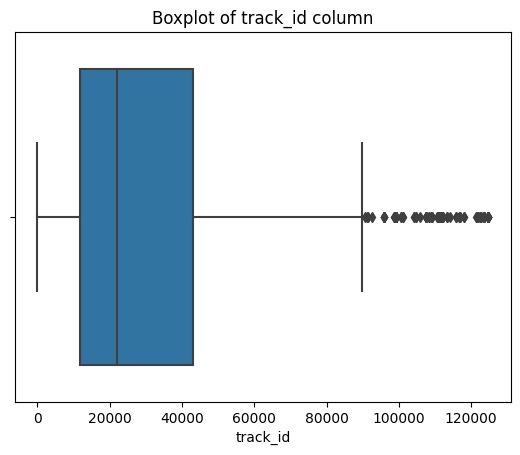

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


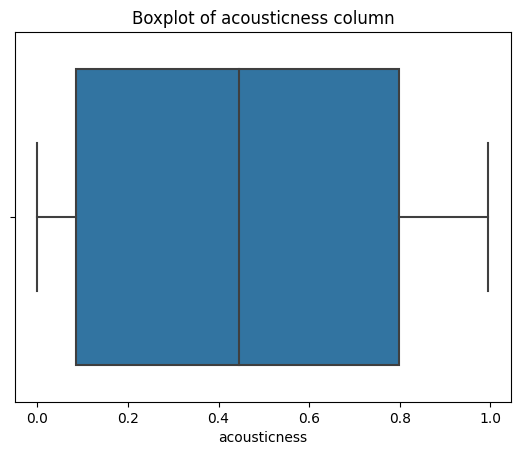

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


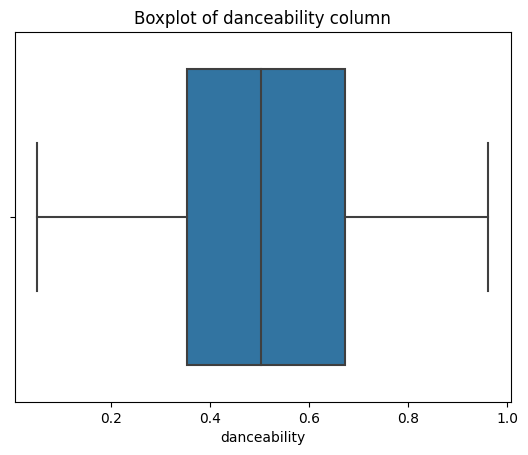

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


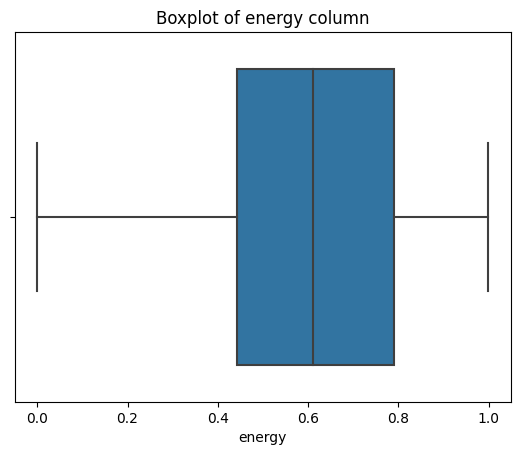

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


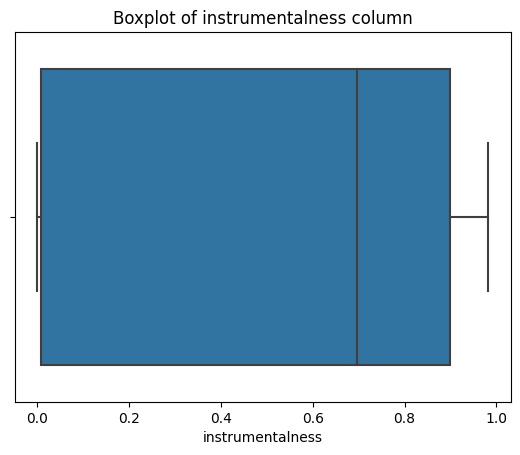

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


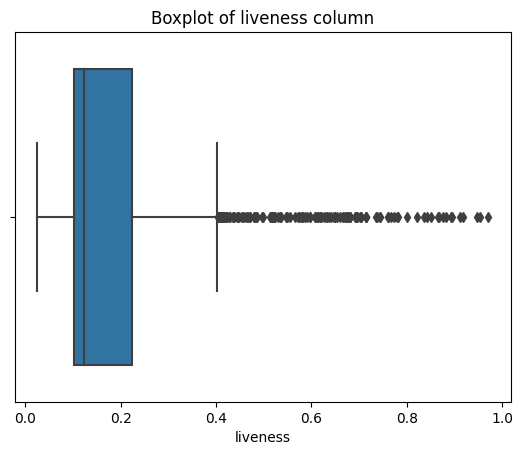

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


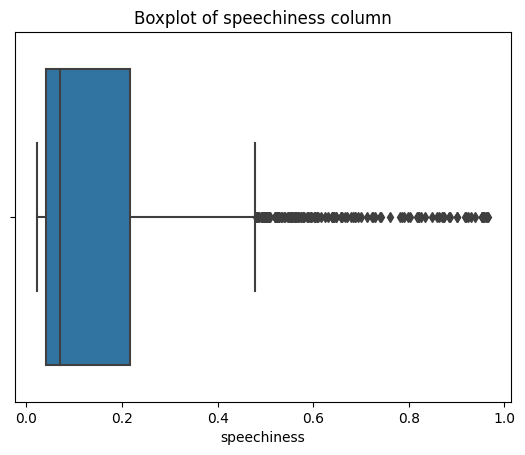

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


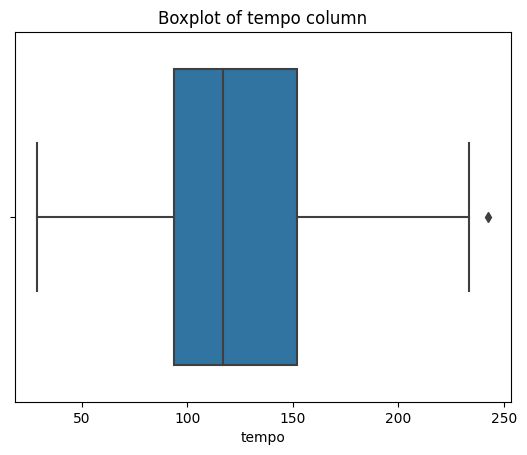

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


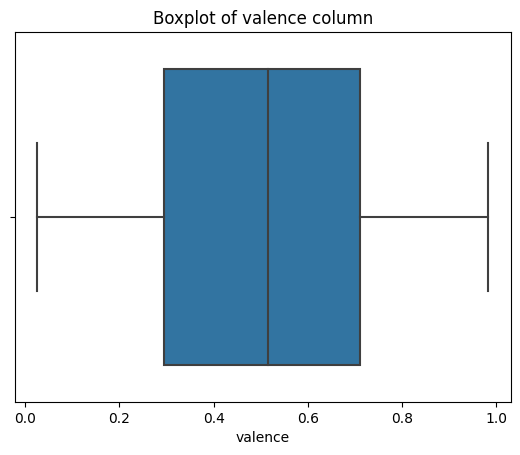

In [47]:
# Outlier treatment
for x in data.columns:
    if data[x].dtype != object:
        sns.boxplot(data=data, x=data[x])
        plt.title(f"Boxplot of {x} column")
        plt.show()

In [48]:
numeric_data = data.select_dtypes(exclude='object')

q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
IQR = q3 - q1

lower = np.maximum(0, q1 - 1.5*IQR)
upper = q3 + 1.5*IQR

In [49]:
lower

track_id           0.000
acousticness       0.000
danceability       0.000
energy             0.000
instrumentalness   0.000
liveness           0.000
speechiness        0.000
tempo              5.983
valence            0.000
dtype: float64

In [50]:
upper

track_id           89901.000
acousticness           1.870
danceability           1.153
energy                 1.311
instrumentalness       2.237
liveness               0.402
speechiness            0.481
tempo                239.770
valence                1.337
dtype: float64

In [51]:
for x in data.columns:
    if (x != 'track_id') and (data[x].dtype != object):
        data[x] = np.where(data[x] < lower[x], lower[x], data[x])
        data[x] = np.where(data[x] > upper[x], upper[x], data[x])


c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


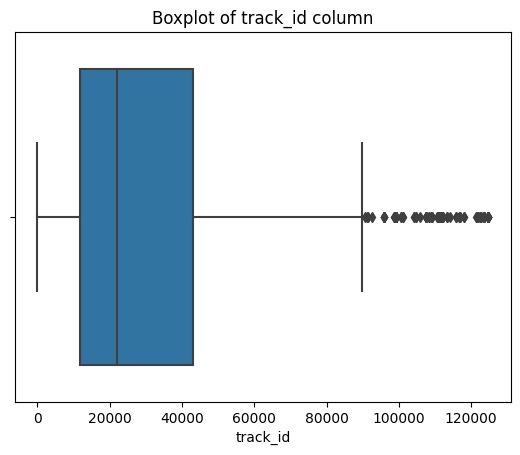

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


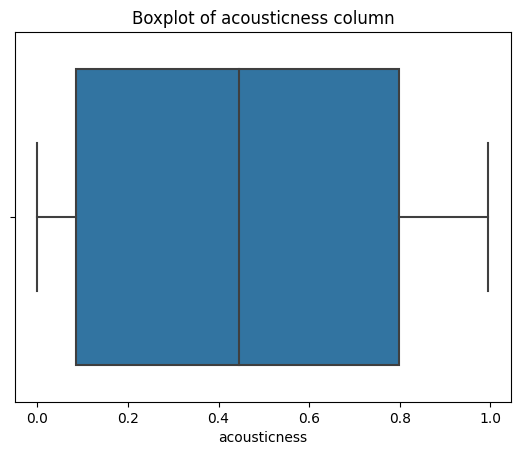

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


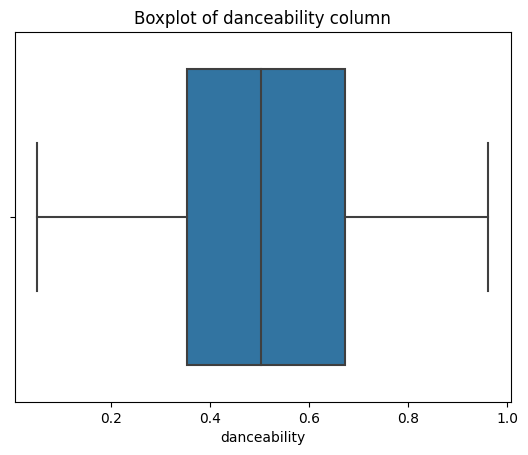

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


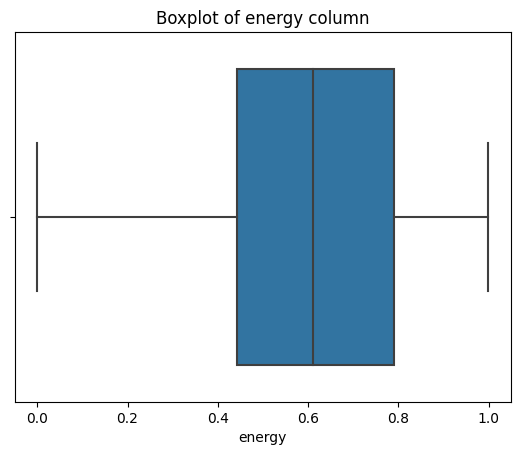

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


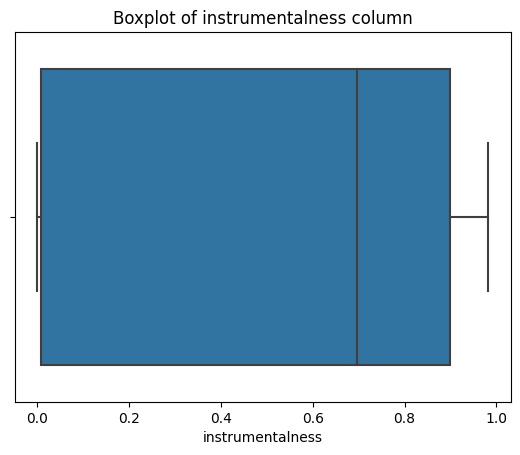

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


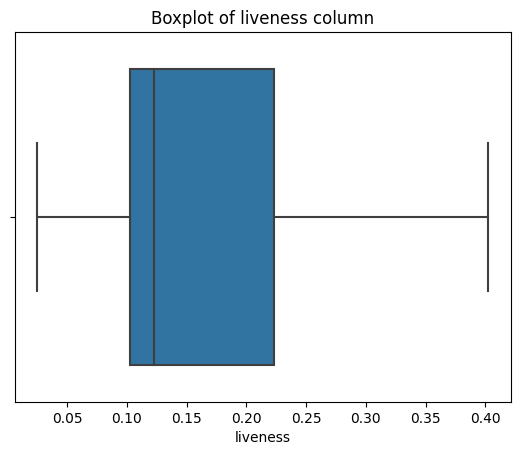

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


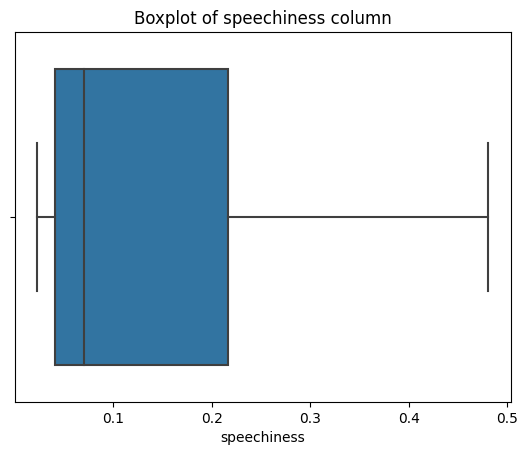

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


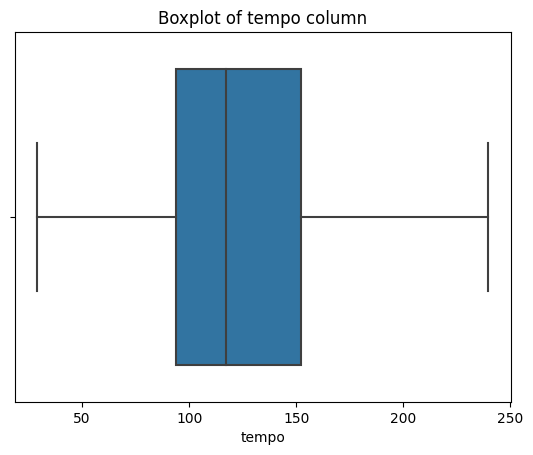

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


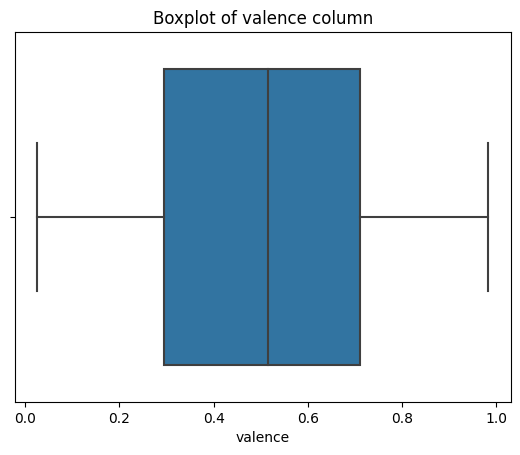

In [52]:
for x in data.columns:
    if data[x].dtype != object:
        sns.boxplot(data=data, x=data[x])
        plt.title(f"Boxplot of {x} column")
        plt.show()

## Pairwise relationships between continuous variables
<p>We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:</p>
<ul>
<li>To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).</li>
<li>When our datasets are very large, using fewer features can drastically speed up our computation time.</li>
</ul>
<p>To get a sense of whether there are any strongly correlated features in our data, we will use built-in functions in the <code>pandas</code> package.</p>

In [53]:
# Checking the distributions
from scipy import stats

normal_distributed = []
not_normal_distributed = []

for i in data.columns:
    if data[i].dtype != object:
        ks_stat, ks_p_value = stats.kstest(data[i], cdf='norm')
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {ks_stat}')
        print(f'p-value: {ks_p_value}')
        print('\n')
        if ks_p_value > 0.05:
            normal_distributed.append(i)
        else:
            not_normal_distributed.append(i)

Column: track_id
Kolmogorov-Smirnov Test:
Test Statistic: 0.998900812249527
p-value: 0.0


Column: acousticness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5000008396937118
p-value: 0.0


Column: danceability
Kolmogorov-Smirnov Test:
Test Statistic: 0.5341064046183779
p-value: 0.0


Column: energy
Kolmogorov-Smirnov Test:
Test Statistic: 0.5377779628445467
p-value: 0.0


Column: instrumentalness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0


Column: liveness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5126280886645144
p-value: 0.0


Column: speechiness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5092680832731188
p-value: 0.0


Column: tempo
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0


Column: valence
Kolmogorov-Smirnov Test:
Test Statistic: 0.5103781851560639
p-value: 0.0




In [54]:
normal_distributed

[]

In [55]:
not_normal_distributed

['track_id',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence']

In [56]:
data['genre_top'].value_counts()

genre_top
Rock       910
Hip-Hop    910
Name: count, dtype: int64

In [57]:
data['genre_top'] = data['genre_top'].map({'Rock':0, 'Hip-Hop':1})

In [58]:
def target_correlation(data, target, threshold=0.01):
    corr_matrix = data.corr(method='spearman')
    
    result_explaining_target = []
    result_not_explaining_target = []
    
    for variable in corr_matrix.index:
        if variable != target:
            correlation = corr_matrix.loc[variable, target]
            if abs(correlation) > threshold:
                result_explaining_target.append({'Variable': variable, 'Correlation with Target': correlation})
            else:
                result_not_explaining_target.append({'Variable': variable, 'Correlation with Target': correlation})
    
    return pd.DataFrame(result_explaining_target), pd.DataFrame(result_not_explaining_target)


In [59]:
explaining_target, not_explaining_target = target_correlation(data, 'genre_top')
explaining_target

,Variable,Correlation with Target
0,track_id,0.054
1,acousticness,-0.104
2,danceability,0.579
3,energy,-0.209
4,instrumentalness,-0.386
5,speechiness,0.614
6,tempo,-0.174
7,valence,0.327


In [60]:
not_explaining_target

,Variable,Correlation with Target
0,liveness,-0.004


We have to drop one column when threshold is 0.01. (Threshold is low, don't pay attention)

In [61]:

def intercorrelation(data, target, threshold=0.5):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()

    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

In [62]:
intercorrelated_result = intercorrelation(data, 'genre_top')
intercorrelated_result

,Variable 1,Variable 2


There is no any correlated column in our data when threshold is 0.5.

In [63]:
# Create a correlation matrix
corr_matrix = data.corr(numeric_only=True, method='spearman')
corr_matrix.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,1.000000,-0.304081,0.088939,0.127010,-0.195280,0.036354,-0.032069,-0.033648,0.016665,0.054488
acousticness,-0.304081,1.000000,-0.089424,-0.226646,0.144208,0.035402,0.033450,-0.015249,-0.005360,-0.104287
danceability,0.088939,-0.089424,1.000000,-0.275624,-0.247172,-0.139904,0.319550,-0.233104,0.465264,0.579186
energy,0.127010,-0.226646,-0.275624,1.000000,-0.000871,0.107677,-0.003692,0.178153,-0.057200,-0.208848
instrumentalness,-0.195280,0.144208,-0.247172,-0.000871,1.000000,-0.138042,-0.465526,0.056168,-0.212956,-0.386256
liveness,0.036354,0.035402,-0.139904,0.107677,-0.138042,1.000000,0.071038,-0.023018,-0.082558,-0.004195
speechiness,-0.032069,0.033450,0.319550,-0.003692,-0.465526,0.071038,1.000000,-0.022833,0.172986,0.614079
tempo,-0.033648,-0.015249,-0.233104,0.178153,0.056168,-0.023018,-0.022833,1.000000,0.005314,-0.173855
valence,0.016665,-0.005360,0.465264,-0.057200,-0.212956,-0.082558,0.172986,0.005314,1.000000,0.326806
genre_top,0.054488,-0.104287,0.579186,-0.208848,-0.386256,-0.004195,0.614079,-0.173855,0.326806,1.000000


Here we can see an interesting correlation between <code>danceability</code> and <code>valence</code>, but it's not strong enough.
<hr>
<b>
So we don't need to drop any columns for intercorrelation.

In [64]:
# Extract the list of variables from not_explaining_target
not_explaining_target_variables = not_explaining_target['Variable'].tolist()
not_explaining_target_variables.append('track_id')
data = data.drop(columns=not_explaining_target_variables)

In [65]:
data.head()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,genre_top
1291,0.924,0.368,0.937,0.058,0.150,124.434,0.124,0
2024,0.002,0.575,0.887,0.565,0.055,92.994,0.474,0
3471,0.000,0.352,0.945,0.198,0.081,230.087,0.242,0
2144,0.938,0.162,0.430,0.871,0.045,88.122,0.280,0
1766,0.849,0.605,0.315,0.934,0.032,125.673,0.858,0


In [66]:
data.shape

(1820, 8)

In [67]:
data.columns.tolist()

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'speechiness',
 'tempo',
 'valence',
 'genre_top']

In [68]:
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_variance(data, columns):
    vif_data = data[columns]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({
        'VIF':vif_values,
        'Columns':columns
    })
    return vif_result

calculate_variance(data, [
    'acousticness',
    # 'danceability', # 10.007
    'energy',
    'instrumentalness',
    'speechiness',
    # 'tempo',      # 9.706
    'valence',
    'genre_top'
])

,VIF,Columns
0,2.594,acousticness
1,4.416,energy
2,2.766,instrumentalness
3,3.399,speechiness
4,4.627,valence
5,3.147,genre_top


We have to drop one more column which is <code>danceability</code>, <code>tempo</code> column because of we get this result after Variance Inflation Factor

In [69]:
data = data.drop(['danceability', 'tempo'], axis=1)

## Normalizing the feature data
<p>As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong correlations between our features, we can instead use a common approach to reduce the number of features called <strong>principal component analysis (PCA)</strong>. </p>
<p>It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes. </p>
<p>However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our data. There are a few methods to do this, but a common way is through <em>standardization</em>, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).</p>

In [70]:
# Define our features
features = data.drop(['genre_top'], axis=1)

# Define our labels
labels = data['genre_top']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [71]:
features.head()

,acousticness,energy,instrumentalness,speechiness,valence
1291,0.924,0.937,0.058,0.150,0.124
2024,0.002,0.887,0.565,0.055,0.474
3471,0.000,0.945,0.198,0.081,0.242
2144,0.938,0.430,0.871,0.045,0.280
1766,0.849,0.315,0.934,0.032,0.858


In [72]:
scaled_features.shape

(1820, 5)

## Principal Component Analysis on our scaled data
<p>Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use <strong>scree-plots</strong> and <strong>cumulative explained ratio plots</strong> to find the number of components to use in further analyses.</p>
<p>Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.</p>

In [73]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance_ratio = pca.explained_variance_ratio_
exp_variance_ratio

array([0.32888383, 0.24948035, 0.1691344 , 0.15600096, 0.09650047])

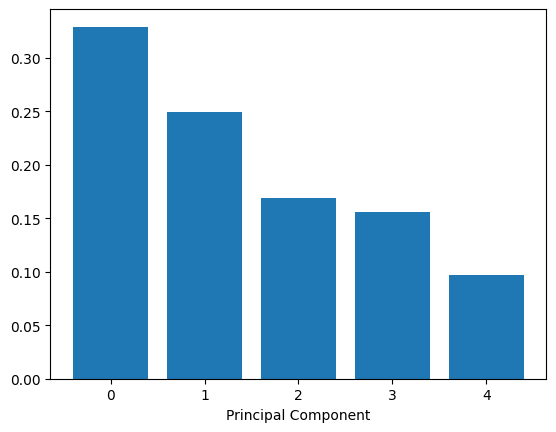

In [74]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance_ratio)
ax.set_xlabel('Principal Component')
plt.show()

## Further visualization of PCA
<p>Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. </p>
<p>But all is not lost! Instead, we can also look at the <strong>cumulative explained variance plot</strong> to determine how many features are required to explain, say, about 90% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.</p>

In [75]:
# using numpy
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance_ratio)
cum_exp_variance

array([0.32888383, 0.57836418, 0.74749857, 0.90349953, 1.        ])

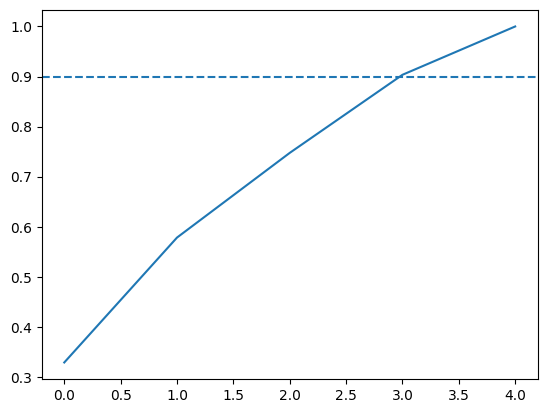

In [76]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(data.shape[1]-1),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.show()

In [77]:
# Find the number of components to retain at least 95% of the variance
n_components = np.argmax(np.cumsum(exp_variance_ratio) >= 0.9 * np.sum(exp_variance_ratio)) + 1

print("Number of components to retain 90% of variance:", n_components)

Number of components to retain 90% of variance: 4


In [78]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=42)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [79]:
pca_projection.shape

(1820, 4)

## 9. Does balancing our dataset improve model bias?
<p>We've now balanced our dataset, but in doing so, we've removed a lot of data points that might have been crucial to training our models. Let's test to see if balancing our data improves model bias towards the "Rock" classification while retaining overall classification performance. </p>
<p>Note that we have already reduced the size of our dataset and will go forward applying dimensionality reduction, it is not so appropriate for this dataset but anyway. In practice, we would consider dimensionality reduction more rigorously when dealing with vastly large datasets and when computation times become prohibitively large.</p>

In [80]:
# import train_test_split for Logistic Regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, random_state=42, test_size=0.2)

In [81]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_test_predictions = log_model.predict(X_test)

In [82]:
# Create the classification report for Logistic Regression
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_test_predictions)
print(f"Classification report of Logistic Model with PCA_projection: \n {class_report}")

Classification report of Logistic Model with PCA_projection: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       181
           1       0.80      0.79      0.80       183

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364



In [83]:
labels.value_counts()

genre_top
0    910
1    910
Name: count, dtype: int64

In [84]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix

array([[146,  35],
       [ 39, 144]], dtype=int64)

In [85]:
142/(142+39)

0.7845303867403315

In [86]:
144/(144+39)

0.7868852459016393

## 10. Using cross-validation to evaluate our models
<p>Success! Balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what's called <strong>cross-validation</strong> (CV). This step allows us to compare models in a more rigorous fashion.</p>
<p>Since the way our data is split into train and test sets can impact model performance, CV attempts to split the data multiple ways and test the model on each of the splits. Although there are many different CV methods, all with their own advantages and disadvantages, we will use what's known as <strong>K-fold</strong> CV here. K-fold first splits the data into K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score.</p>

In [87]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10)

# Train our models using KFold cv
log_reg_cv_score = cross_val_score(log_model, pca_projection, labels, cv=kf)

# Print the mean of each array of scores
print(f'Cross validation score of Logistic Regression: {log_reg_cv_score.mean()}')

Cross validation score of Logistic Regression: 0.7241758241758242


### Let's do this step again on first model (notebook 1)
### We get 89% in first notebook, and 72% in second notebook (balanced one). Based on all of the scores we have decided that using imbalanced dataset (data points more than balanced one) is more appropriate for production.